# Points

Data Source - https://msi.nga.mil/Publications/WPI

- Convert the excel file into a csv and save to the resources folder. 
- Alternatively, there is a ports.csv file in the resources folder with a series of lat/longs placed randomly at the coast. 

In [11]:
import pandas as pd
ports = pd.read_csv("../resources/ports.csv")

In [12]:
print(ports)

             lat         lon
0      19.432680   93.554935
1      54.532050   18.526400
2      40.656520   27.663445
3      50.474590    4.009098
4      28.391250  129.503900
...          ...         ...
19838  37.062715  -79.560240
19839  34.690600  -76.560000
19840  60.094400   24.752800
19841  59.460300   16.318600
19842  29.375600   34.793900

[19843 rows x 2 columns]


In [13]:
from shapely.geometry import Point
import geopandas as gpd

port_geometry = [Point(xy) for xy in zip(ports['lon'], ports['lat'])]
port_geodata = gpd.GeoDataFrame(ports, crs="EPSG:4326", geometry=port_geometry)

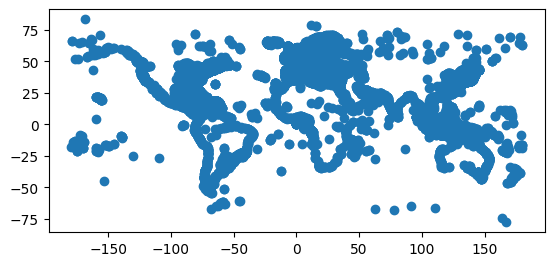

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
port_geodata.plot(ax=ax)
plt.show()

In [15]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
port_geodata.plot(ax=ax, transform=ccrs.PlateCarree())
plt.show()

ModuleNotFoundError: No module named 'cartopy._version'

#### Exercise


My attempt

![alt text](../resources/assets/ports.png "Title")


## Plotting Lines

Data Source - https://openflights.org/data.html

- Download airports.dat and place in the resources folder
- Download routes.dat and place in the resources folder

In [ ]:
airports = pd.read_csv("../resources/airports", delimiter=',', names=['id', 'name', 'city', 'country', 'iata', 
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

In [ ]:
print(airports)

### Exercise

- Create a list of points from the lat/long values in the airports DataFrame
- Convert the airports dataframe to a GeoDataFrame using the list of points created above
- Generate a map of the worlds airports

In [ ]:
routes = pd.read_csv("../resources/routes", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [ ]:
print(routes)

In [ ]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [ ]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

print(routes.columns)

In [ ]:
from shapely.geometry import LineString

routes_geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes_geodata = gpd.GeoDataFrame(routes, geometry=routes_geometry, crs='EPSG:4326')

In [ ]:
print(routes.columns)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.patch.set_facecolor('black')

routes_geodata.plot(ax=ax, color='white', linewidth=0.1)

plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(20,20))
ax.patch.set_facecolor('black')
routes_geodata.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)
plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)
plt.show()

### Exercise

- Use the routes data to add a new column to the airports DataFrame with a value showing the number of flights that landed in that airport
- Create a plot combining the routes and airports into one
- Scale the size of the airport points according to the number of flights that land there.
- The expected output is shown below.

![alt text](../resources/assets/airroutes_mad.png "Title")